In [19]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from scipy import signal as sg
from scipy import integrate
from scipy.interpolate import interpn,interp1d,RegularGridInterpolator, Akima1DInterpolator

import time
from tqdm import notebook
import importlib

import torch
from torch.utils.data import TensorDataset, DataLoader

import tarfile

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


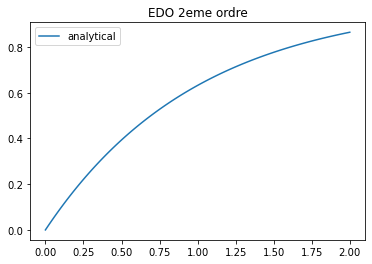

In [21]:
L = 1.0
D = 0.0
V = 1.0

def f(D, L, V, x):
    return (L-D)*(1-np.exp(-V*x)) + D

X = np.linspace(0,2, 100)
Y = f(D, L, V, X)
plt.plot(X,Y,label='analytical')
plt.title("EDO 2eme ordre")
plt.legend()

l:  0.5
v:  0.5
l:  0.5
v:  0.5
l:  0.5003009872729984
v:  0.5005988183960585
l:  0.5014855956002218
v:  0.5029394718304971
l:  0.5041125087649071
v:  0.5080741204795609
l:  0.5087264341697658
v:  0.5169413914830319
l:  0.5158688675852393
v:  0.5303308440995924
l:  0.5260839841812274
v:  0.5488355787200798
l:  0.5399118315377237
v:  0.5727951326174163
l:  0.5578596149904226
v:  0.6022332842091398
l:  0.5803426884948272
v:  0.6367994969108149
l:  0.6075918210071724
v:  0.675728207257466
l:  0.6395342152210447
v:  0.7178354564800006
l:  0.675672601756824
v:  0.7615740035398899
l:  0.7150049423549589
v:  0.8051611450436214
l:  0.7560359473281109
v:  0.8467747064750464
l:  0.7969169545241714
v:  0.8847853777389247
l:  0.8357072846182823
v:  0.9179702563134938
l:  0.8706933133471007
v:  0.945649157638596
l:  0.9006650098971778
v:  0.967708687832231
l:  0.9250616604958585
v:  0.9845184952597374
l:  0.9439547410683249
v:  0.9967781253839004
l:  0.9579011242132245
v:  1.005345704254194
l:  0.9

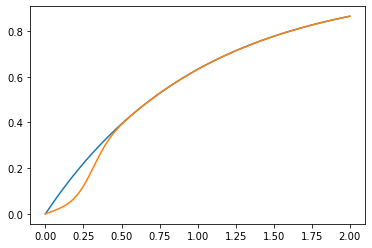

In [22]:


l = 0.5
v = 0.5
Z = []
epsilon = 2.0

for x in X:
    
    print('l: ', l)
    print('v: ', v)
    y = f(D, L, V, x)
    l += -epsilon*(1 - np.exp(-v*x))*(f(D, l, v, x)-y)
    v += -epsilon*(L-D)*(x*np.exp(-v*x))*(f(D, l, v, x)-y)
    Z.append(f(D, l, v, x))

plt.plot(X,Y,label='analytical')
plt.plot(X,Z,label='estimated')
